# Average Cluster Heatmaps for Human Judgement model
Averages the heatmaps of all images within one cluster of the UMAP representation after k-means clustering.

In [ ]:
import os
from tqdm.notebook import tqdm
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import glob
from facesim3d import local_paths

In [ ]:
output_dir = local_paths.DIR_PCA_AE_RESULTS_HJ
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Load UMAP
latents_2d = np.load(os.path.join(output_dir, "latent_UMAP_AE_HJ.npy"))
latents = np.load(os.path.join(output_dir, "latent_codes_HJ.npy"))
print('Loaded UMAP representations and Latents')

Loaded UMAP representations and Latents


In [ ]:
paths = np.load(os.path.join(output_dir, "image_paths_HJ.npy"), allow_pickle=True)
print(f"Example image path: {paths[0]}")

Example image path: /work/lg77sypy-create_AE_training_data/scripts/single_LRP_HJ_heatmaps/single_heatmaps/triplet148544_gt081.png


In [13]:
# KMeans Clustering ===
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(latents)
centroids = kmeans.cluster_centers_

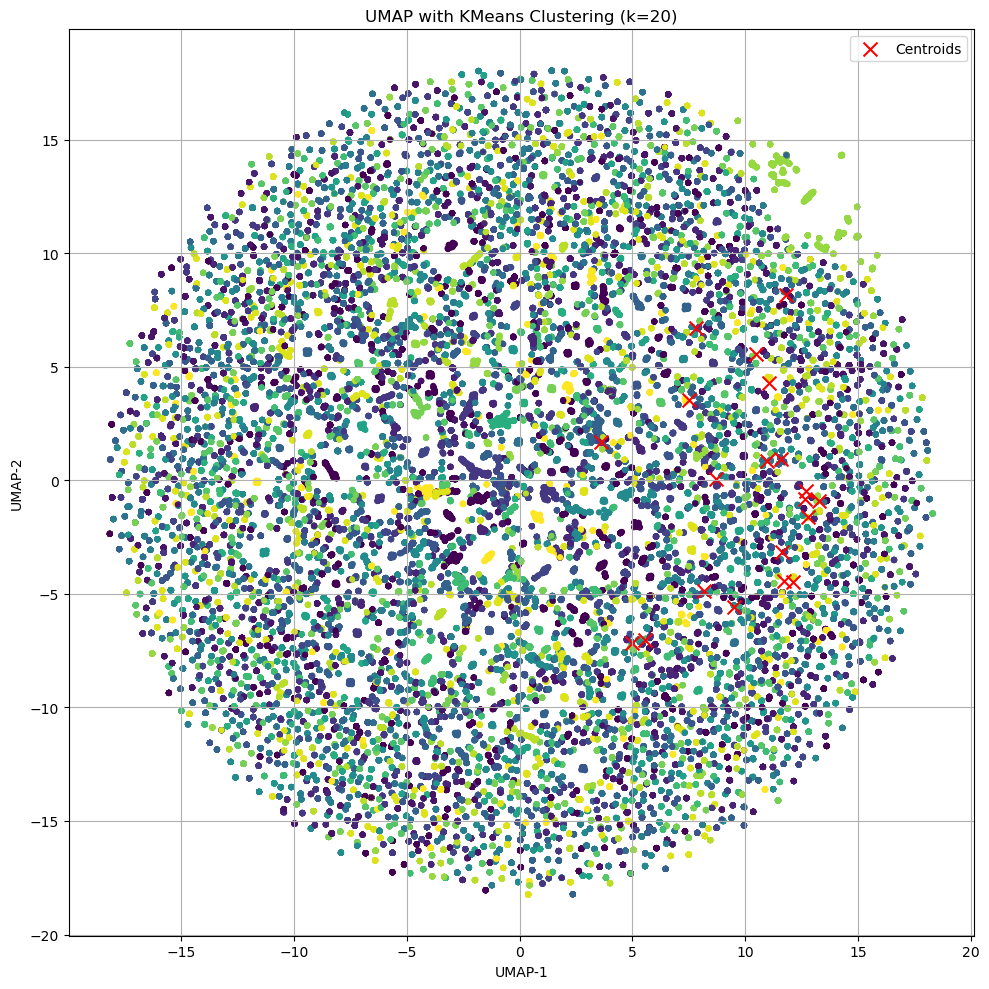

In [8]:
import matplotlib.pyplot as plt
# Plot the Clustering
# Create a color map
plt.figure(figsize=(10, 10))

# Scatter plot, color by cluster label
scatter = plt.scatter(
    latents_2d[:, 0], latents_2d[:, 1],
    c=labels, cmap="viridis", s=20, alpha=1, edgecolors='none',
)

# Optionally plot centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c="red", s=100, marker="x", label="Centroids"
)

plt.title(f"UMAP with KMeans Clustering (k={n_clusters})")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = np.unique(labels)
print(cluster_labels)

for i,cluster in enumerate(cluster_labels):
    if os.path.isfile(os.path.join(output_dir, f"all_img_k=20-cluster_{cluster}.png")):
        print(f"Skipping Cluster at i = {i}")
        continue
    
    print(f"Processing Cluster {cluster}")
    indices = np.where(labels == cluster)[0]

    images = []

    # Initialize manual progress bar 
    with tqdm(total=len(indices), desc=f"Cluster {cluster}", leave=False) as pbar:
        for idx in indices:
            npy_path = paths[idx].replace('.png', '.npy')
            try:
                img_array = np.load(npy_path)
                images.append(img_array)
                pbar.update(1)  # manually update the progress bar
            except Exception as e:
                print(f"Error loading {npy_path}: {e}")
                
    avg_img = np.mean(images, axis=0)
    np.save(os.path.join(output_dir, f"all_img_k=20-cluster_{cluster}.npy"), avg_img)

    amax = np.max(avg_img)
    vmin, vmax = -amax, amax
    
    plt.figure(figsize=(8, 8))
    plt.imshow(avg_img, cmap="seismic", vmin=vmin, vmax=vmax)
    plt.axis("off")
    plt.title(f"Cluster {cluster}\nN={len(images)}")
    plt.tight_layout()
    
    save_path = os.path.join(output_dir, f"all_img_k=20-cluster_{cluster}.png")
    plt.savefig(save_path)
    plt.close()
    
    print(f"Saved average image for Cluster {cluster} to {save_path}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Skipping Cluster at i = 0
Skipping Cluster at i = 1
Skipping Cluster at i = 2
Skipping Cluster at i = 3
Skipping Cluster at i = 4
Skipping Cluster at i = 5
Skipping Cluster at i = 6
Skipping Cluster at i = 7
Skipping Cluster at i = 8
Skipping Cluster at i = 9
Processing Cluster 10


Cluster 10:   0%|          | 0/6215 [00:00<?, ?it/s]

Saved average image for Cluster 10 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_10.png
Processing Cluster 11


Cluster 11:   0%|          | 0/6009 [00:00<?, ?it/s]

Saved average image for Cluster 11 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_11.png
Processing Cluster 12


Cluster 12:   0%|          | 0/4178 [00:00<?, ?it/s]

Saved average image for Cluster 12 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_12.png
Processing Cluster 13


Cluster 13:   0%|          | 0/7350 [00:00<?, ?it/s]

Saved average image for Cluster 13 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_13.png
Processing Cluster 14


Cluster 14:   0%|          | 0/6885 [00:00<?, ?it/s]

Saved average image for Cluster 14 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_14.png
Processing Cluster 15


Cluster 15:   0%|          | 0/7595 [00:00<?, ?it/s]

Saved average image for Cluster 15 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_15.png
Processing Cluster 16


Cluster 16:   0%|          | 0/6325 [00:00<?, ?it/s]

Saved average image for Cluster 16 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_16.png
Processing Cluster 17


Cluster 17:   0%|          | 0/8016 [00:00<?, ?it/s]

Saved average image for Cluster 17 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_17.png
Processing Cluster 18


Cluster 18:   0%|          | 0/10353 [00:00<?, ?it/s]

Saved average image for Cluster 18 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_18.png
Processing Cluster 19


Cluster 19:   0%|          | 0/5715 [00:00<?, ?it/s]

Saved average image for Cluster 19 to /work/lg77sypy-create_AE_training_data/scripts/cluster_average_HJ_AE/all_img_k=20-cluster_19.png


# Test which cluster number fits best to the data

## evaluate cluster distances

In [14]:
# Subsample 30% of the data
subsample_ratio = 0.3
n_samples = int(len(latents) * subsample_ratio)

np.random.seed(42)  # for reproducibility
sub_idx = np.random.choice(len(latents), n_samples, replace=False)
latents_sample = latents[sub_idx]

In [15]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import torch

# Ensure latents is numpy
if isinstance(latents_sample, torch.Tensor):
    latents_np = latents_sample.cpu().numpy()
else:
    latents_np = np.array(latents_sample)

sil_scores = {}

print("Calculating silhouette scores for k = 2 to 40...\n")

for k in range(2, 41):
    print(f"Running KMeans for k = {k}")

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(latents_np)

    try:
        score = silhouette_score(latents_np, labels)
    except Exception as e:
        print(f"Could not compute silhouette score for k={k}: {e}")
        score = None

    sil_scores[k] = score
    print(f" → Silhouette score: {score}")

print("\nFinished computing silhouette scores.")
print("\nSilhouette results:")
for k, score in sil_scores.items():
    print(f"k={k}: {score}")


Calculating silhouette scores for k = 2 to 40...

Running KMeans for k = 2
 → Silhouette score: 0.1467454880475998
Running KMeans for k = 3
 → Silhouette score: 0.13707807660102844
Running KMeans for k = 4
 → Silhouette score: 0.1173887774348259
Running KMeans for k = 5
 → Silhouette score: 0.11432227492332458
Running KMeans for k = 6
 → Silhouette score: 0.11428925395011902
Running KMeans for k = 7
 → Silhouette score: 0.12363898754119873
Running KMeans for k = 8
 → Silhouette score: 0.11461097747087479
Running KMeans for k = 9
 → Silhouette score: 0.1269606351852417
Running KMeans for k = 10
 → Silhouette score: 0.13394537568092346
Running KMeans for k = 11
 → Silhouette score: 0.129493847489357
Running KMeans for k = 12
 → Silhouette score: 0.1351625770330429
Running KMeans for k = 13
 → Silhouette score: 0.12843088805675507
Running KMeans for k = 14
 → Silhouette score: 0.13828174769878387
Running KMeans for k = 15
 → Silhouette score: 0.1424335539340973
Running KMeans for k = 16
 

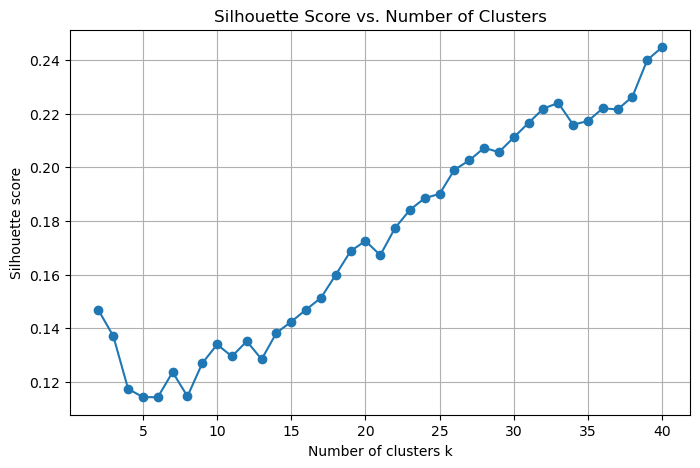

In [17]:
import matplotlib.pyplot as plt

ks = list(sil_scores.keys())
scores = [sil_scores[k] for k in ks]

plt.figure(figsize=(8,5))
plt.plot(ks, scores, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.savefig(os.path.join(output_dir,"silhouette_scores_HJ.png"))
plt.show()

In [18]:
np.save(os.path.join(output_dir,"silhouette_scores_HJ.npy"), scores)

### Plot comparison

In [ ]:
scores_maxp = np.load(os.path.join(output_dir,  "silhouette_scores_MaxP.npy"))

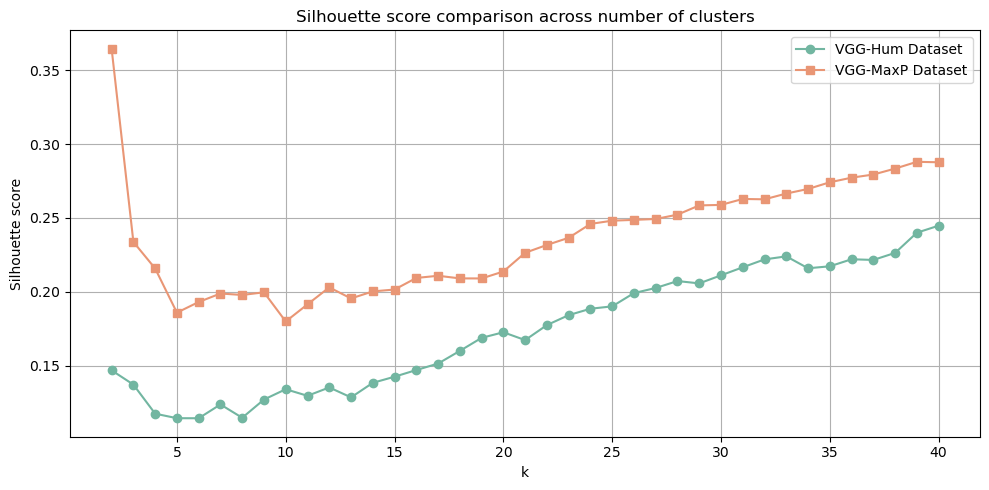

In [ ]:
# --- Plot both lists ---
plt.figure(figsize=(10,5))
plt.plot(ks, scores, marker='o', label='VGG-Hum Dataset', color="#72b6a1")
plt.plot(ks, scores_maxp, marker='s', label='VGG-MaxP Dataset', color="#e99675")

plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score comparison across number of clusters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "comparison_silhouetteScores.png"))
plt.show()

### Plot the 20 cluster averages

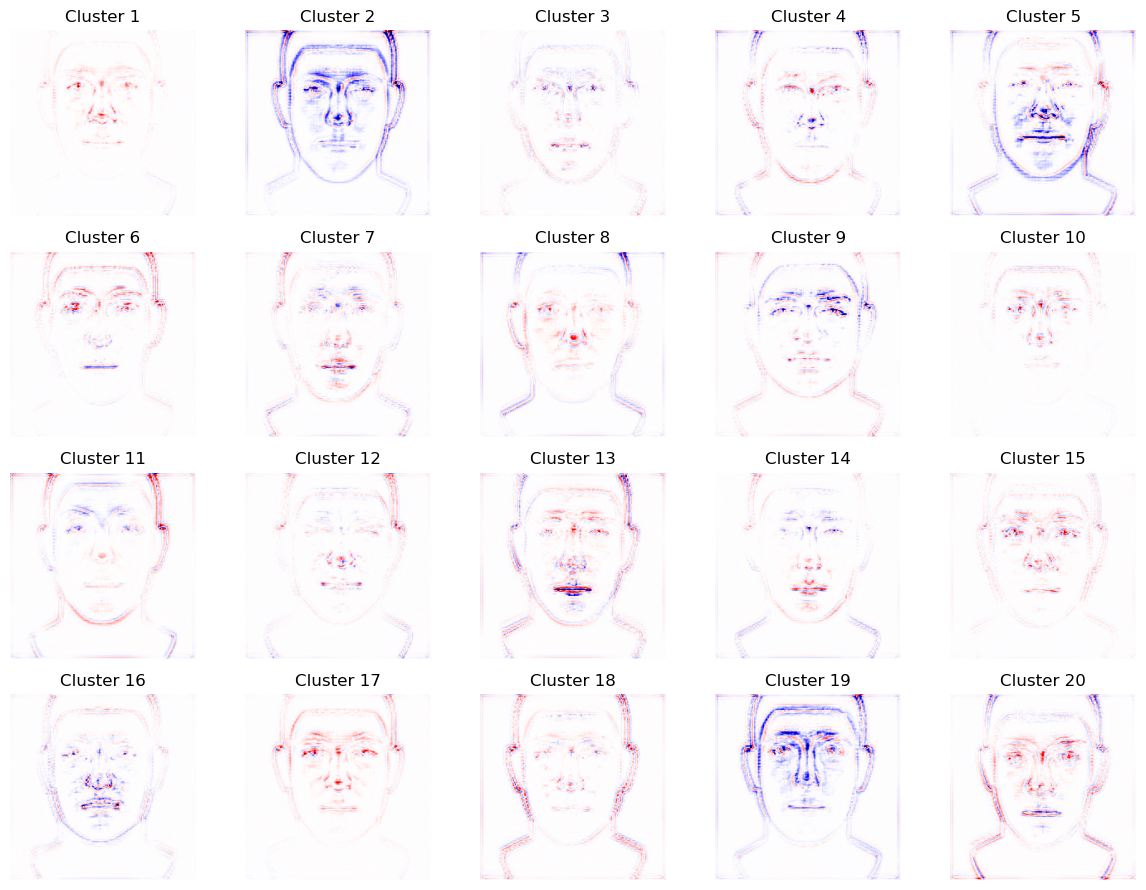

In [11]:
# ========= CONFIG =========
prefix = "all_img_k=20-cluster_"               
num_plots = 20                     
rows, cols = 4, 5                  
# ==========================

# Load filenames (sorted for consistent order)
files = sorted(glob.glob(os.path.join(output_dir, f"{prefix}*.npy")))[:num_plots]

# --- Create figure ---
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))
axes = axes.flatten() 

for i, ax in enumerate(axes):
    if i < len(files):
        img = np.load(files[i])  
        amax = np.max(img)
        vmin, vmax = -amax, amax
        ax.imshow(img, cmap='seismic', vmin=vmin, vmax=vmax) 
        ax.set_title(f"Cluster {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir,"combined_plot_all_clusters_HJ.png"))
plt.show()